In [1]:
import pandas as pd

FILENAME = 'metrics_comparison_test_skill.csv'


def print_df(df):
    # 'display.max_rows', None,
    with pd.option_context('display.max_columns', None, 'display.expand_frame_repr', False):
        print(df)


def get_metrics_df(filename):
    df = pd.read_csv(
        filename,
        sep=';',
        header=0,
        # index_col=0,
    )
    df.rename(columns={r'metric\method': 'metrics'}, inplace=True)
    # df.drop(columns=['optimal', 'miserable'], inplace=True)
    return df


df = get_metrics_df(FILENAME)
print_df(df)

        metrics   MVNN  CP_NN  LA_NN  QHGBR CP_HGBR     QR CP_LinReg CP_NN_skill LA_NN_skill CP_HGBR_skill CP_LinReg_skill
0           MAE  153,0  152,5  152,5  146,0   137,0  144,5     212,3      0,0031      0,0031         0,062           -0,47
1          RMSE  197,5  197,2  197,2  193,4   182,2  188,0     283,4      0,0018      0,0018         0,058           -0,51
2  SMAPE (x100)   1,20   1,19   1,19   1,13    1,07   1,12      1,68      0,0098      0,0098         0,057           -0,50
3          CRPS  111,2  108,4  108,2   95,1    99,2  103,5     152,8       0,025       0,028        -0,043           -0,48
4           NLL   6,97   6,71   6,70   6,66    6,68   6,69      7,07       0,036       0,038       -0,0032          -0,056
5       PINBALL   15,9   19,8   22,6   28,7    16,0   17,5      31,1       -0,25       -0,43          0,44           -0,78


In [2]:
df2 = df.copy()
df2.index = df2.metrics
df2.drop(columns=['metrics'], inplace=True)
df2.replace(r'(\d+),(\d+)', r'\1.\2', regex=True, inplace=True)  # convert to floats
df2 = df2.astype(float)
df2

,MVNN,CP_NN,LA_NN,QHGBR,CP_HGBR,QR,CP_LinReg,CP_NN_skill,LA_NN_skill,CP_HGBR_skill,CP_LinReg_skill
metrics,,,,,,,,,,,
MAE,153.00,152.50,152.50,146.00,137.00,144.50,212.30,0.0031,0.0031,0.0620,-0.470
RMSE,197.50,197.20,197.20,193.40,182.20,188.00,283.40,0.0018,0.0018,0.0580,-0.510
SMAPE (x100),1.20,1.19,1.19,1.13,1.07,1.12,1.68,0.0098,0.0098,0.0570,-0.500
CRPS,111.20,108.40,108.20,95.10,99.20,103.50,152.80,0.0250,0.0280,-0.0430,-0.480
NLL,6.97,6.71,6.70,6.66,6.68,6.69,7.07,0.0360,0.0380,-0.0032,-0.056
PINBALL,15.90,19.80,22.60,28.70,16.00,17.50,31.10,-0.2500,-0.4300,0.4400,-0.780


In [3]:
skills_dict = {col_name: col for col_name, col in df2.items()
               if col_name.endswith('_skill')}
skills_dict

{'CP_NN_skill': metrics
 MAE             0.0031
 RMSE            0.0018
 SMAPE (x100)    0.0098
 CRPS            0.0250
 NLL             0.0360
 PINBALL        -0.2500
 Name: CP_NN_skill, dtype: float64,
 'LA_NN_skill': metrics
 MAE             0.0031
 RMSE            0.0018
 SMAPE (x100)    0.0098
 CRPS            0.0280
 NLL             0.0380
 PINBALL        -0.4300
 Name: LA_NN_skill, dtype: float64,
 'CP_HGBR_skill': metrics
 MAE             0.0620
 RMSE            0.0580
 SMAPE (x100)    0.0570
 CRPS           -0.0430
 NLL            -0.0032
 PINBALL         0.4400
 Name: CP_HGBR_skill, dtype: float64,
 'CP_LinReg_skill': metrics
 MAE            -0.470
 RMSE           -0.510
 SMAPE (x100)   -0.500
 CRPS           -0.480
 NLL            -0.056
 PINBALL        -0.780
 Name: CP_LinReg_skill, dtype: float64}

CP_NN_skill
LA_NN_skill
CP_HGBR_skill
CP_LinReg_skill
saving
showing


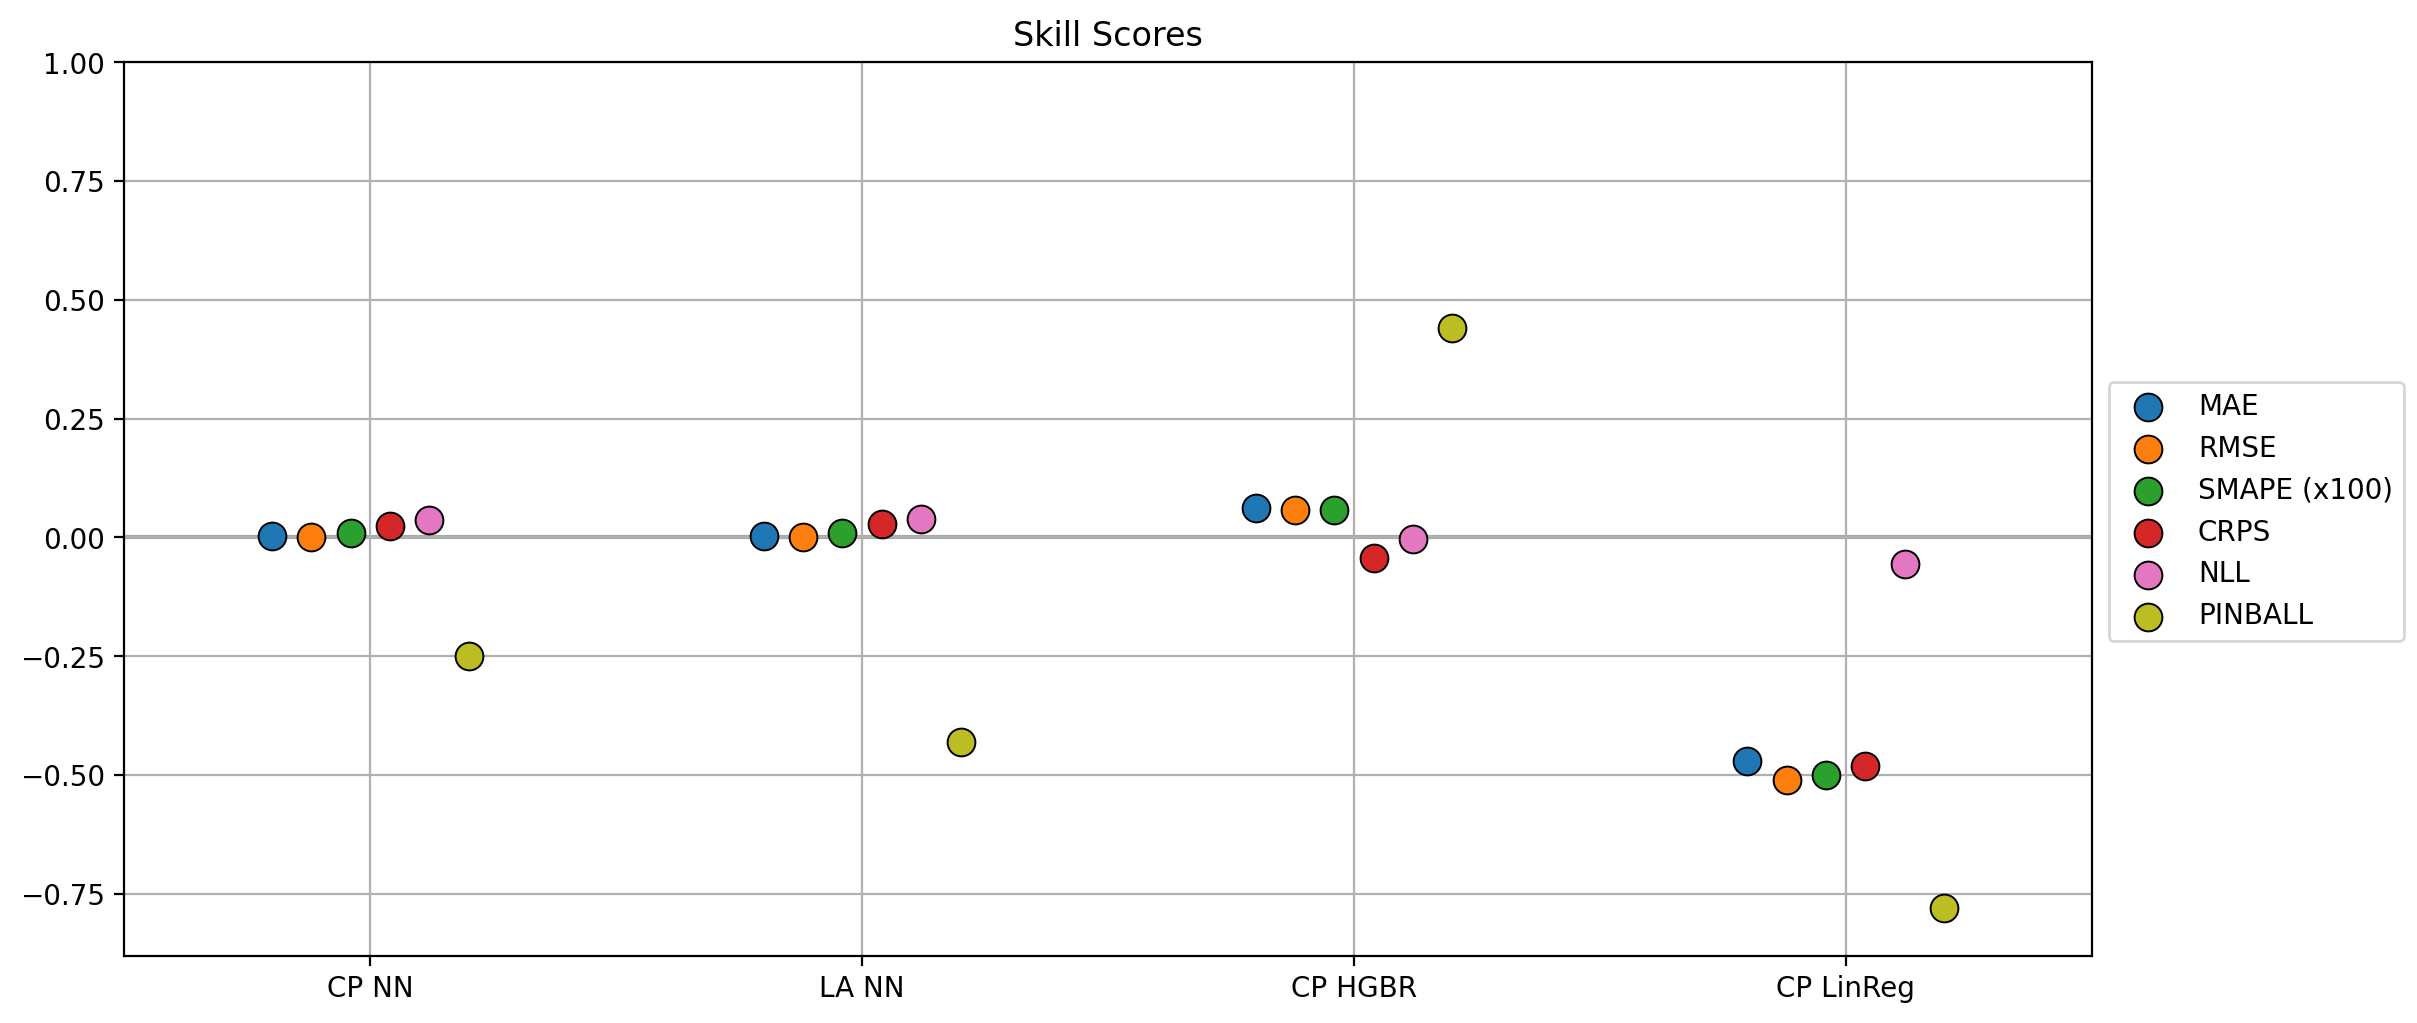

In [112]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

_scale = 2
SCATTER_SIZE = 10 **2
SCATTER_ALPHA = 1
X_SHIFT = _scale*0.5
DPI = 200
FIGURE_PATH = 'comparison_storage/plots/skill_plot.png'
MAX_POINT_SHIFT = _scale * 0.2
Y_LIM_SHIFT = 0.1
EDGECOLOR = 'black'

mpl.style.use('default')

# COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
# remove some unfitting colors
COLORS = [color for color in mcolors.TABLEAU_COLORS.keys() if color not in {'tab:purple', 'tab:brown', 'tab:gray'}]

x_plot = _scale*np.arange(len(skills_dict))
point_shifts = np.linspace(-MAX_POINT_SHIFT, +MAX_POINT_SHIFT, len(df2.index))

fig, ax = plt.subplots(figsize=(12,5), layout='constrained', dpi=DPI)
ax.set_title('Skill Scores')
ax.grid()
ax.set_axisbelow(True)
xlim_bottom, xlim_top = x_plot.min() - X_SHIFT, x_plot.max() + X_SHIFT
ax.set_xlim(xlim_bottom, xlim_top)
ylim_bottom = np.min(list(skills_dict.values())) - Y_LIM_SHIFT
ax.set_ylim(ylim_bottom, 1)

xlabels = [' '.join(label.split('_')[:-1])
           for label in skills_dict.keys()]
ax.set_xticks(x_plot, xlabels)

for i, (method, method_skills) in zip(x_plot, skills_dict.items()):
    print(method)
    for method_skill, color, point_shift in zip(method_skills, COLORS, point_shifts):
        ax.scatter(i + point_shift, method_skill, color=color, s=SCATTER_SIZE, alpha=SCATTER_ALPHA, edgecolor=EDGECOLOR, linewidths=0.7)
    # break

ax.axhline(y=0, color='darkgrey', zorder=0, linestyle='-')
fig.legend(df2.index, loc='outside center right')

if FIGURE_PATH is not None:
    print('saving')
    plt.savefig(FIGURE_PATH)
print('showing')
plt.show()